In [1]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np
import j_py_sad_correlation as jps
import tifffile as tf

In [2]:
data_src = r"E:\data\my data\Arrhythmic imaging April 2024\High framerate\2024-04-04 15.16.08 vid\Allied Vision Technologies GS650 0001f61c\*tif"

In [3]:
oog = OG.BasicOpticalGating()
oog.sequence_manager.set_source(data_src)
oog.settings["pi_space"] = False
oog.run()

Setting source to E:\data\my data\Arrhythmic imaging April 2024\High framerate\2024-04-04 15.16.08 vid\Allied Vision Technologies GS650 0001f61c\*tif
Getting reference sequence
Reference period: 163.595015576324; Reference indices: [17, 185]
Getting SADs
Getting phases


In [4]:
data = oog.sequence_manager.load_tif(data_src)

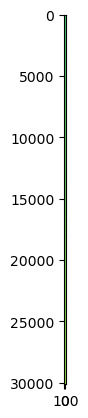

In [5]:
diffs = []
for i in range(data.shape[0]):
    diffs.append(jps.sad_with_references(data[i], oog.sequence_manager.reference_sequence))

plt.imshow(np.array(diffs))
plt.show()

In [6]:
plt.figure(figsize = (40,400))
plt.imshow(np.array(diffs)[0:3000]**4, interpolation = "none")
plt.show()

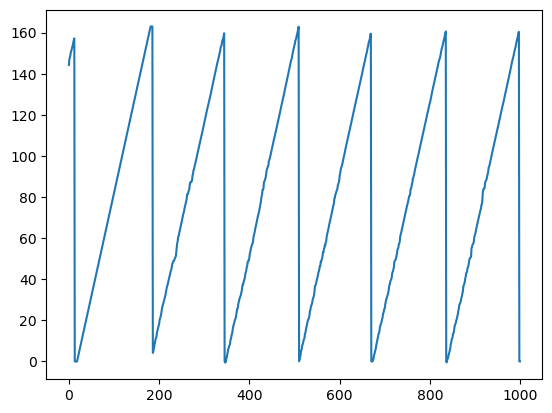

In [7]:
plt.plot(oog.phases[0:1000])

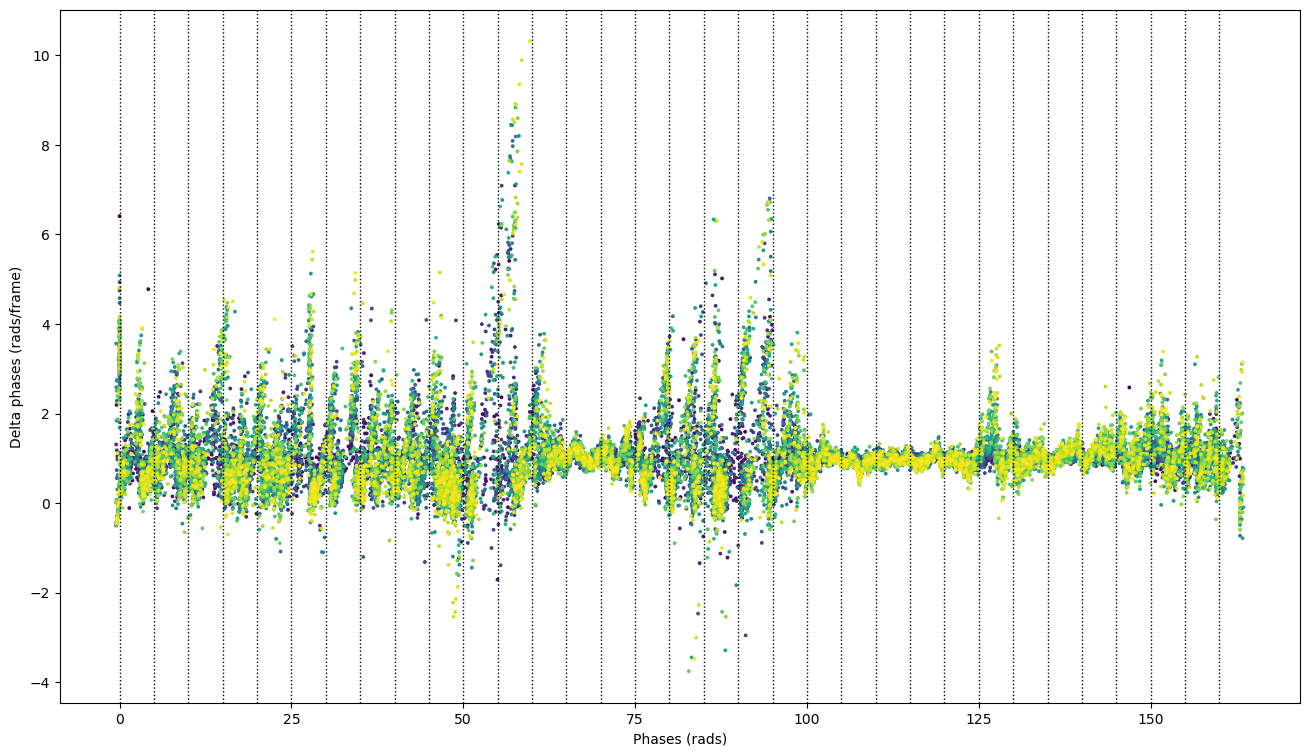

In [8]:
plt.figure(figsize = (16,9))
plt.scatter(oog.phases[1::], oog.delta_phases, c = range(1, len(oog.phases)), s = 3)
for i in range(0,163,5):
    plt.axvline(i, color = "black", linestyle = ":", lw = 1)
plt.xlabel("Phases (rads)")
plt.ylabel("Delta phases (rads/frame)")
plt.show()

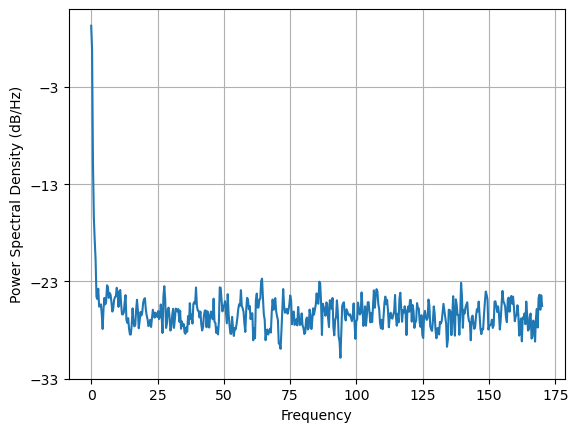

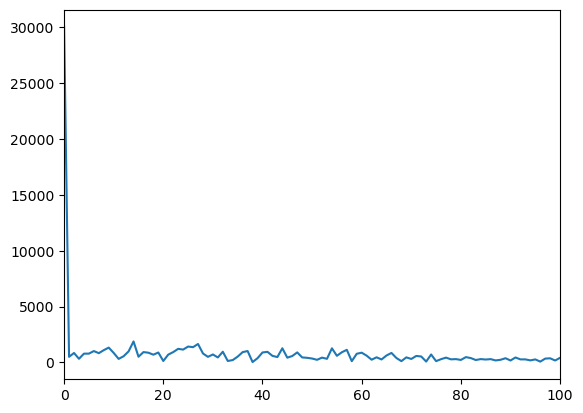

In [9]:
# Perform a power spectrum decomposition on the order delta phases
order = np.argsort(oog.phases[1::])
plt.psd(oog.delta_phases[order], NFFT = 2**10, Fs = 340)
plt.show()
# Perform fourier analysis on the order delta phases
fourier = np.fft.rfft(oog.delta_phases[order])
plt.plot(range(len(fourier)), np.abs(fourier))
plt.xlim(0,100)
plt.show()

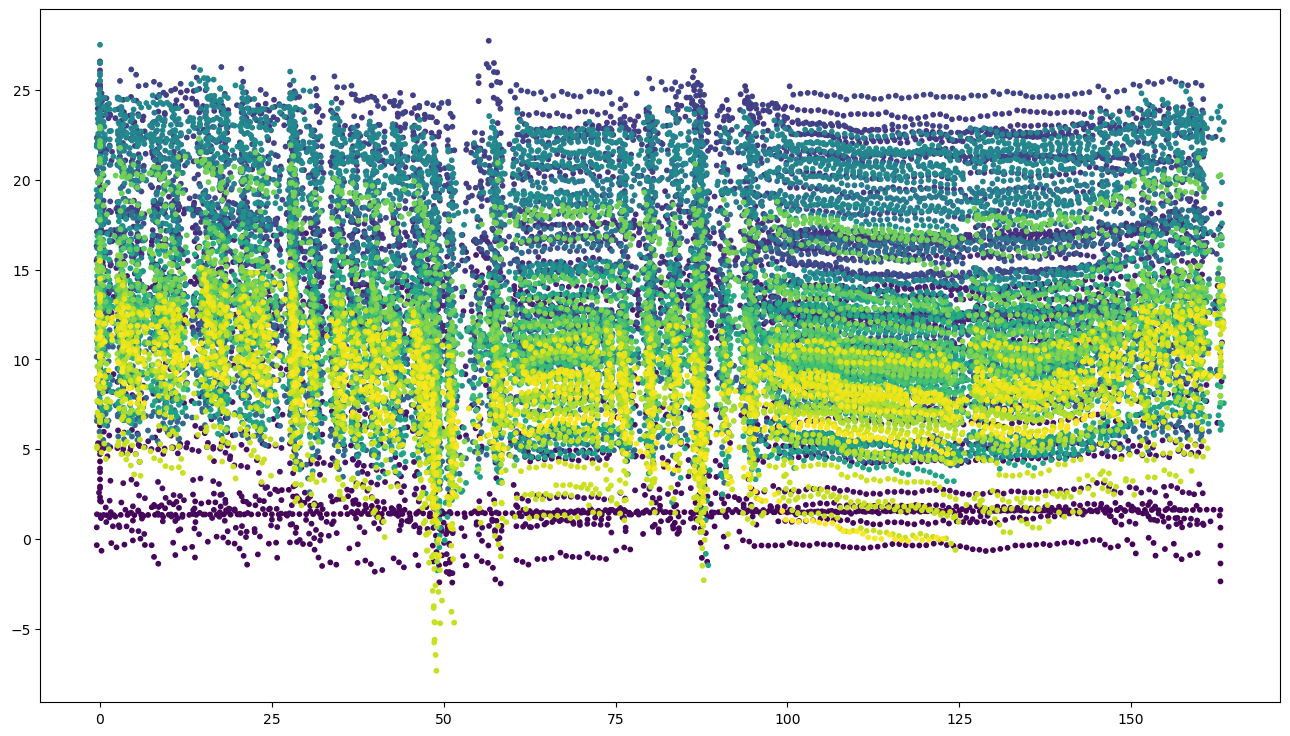

In [10]:
delta_phases_subtracted = np.array(oog.delta_phases) - np.mean(oog.delta_phases)
plt.figure(figsize = (16,9))
plt.scatter(oog.phases[1::], np.cumsum(delta_phases_subtracted), c = range(len(oog.phases[1::])), s = 10)
plt.show()

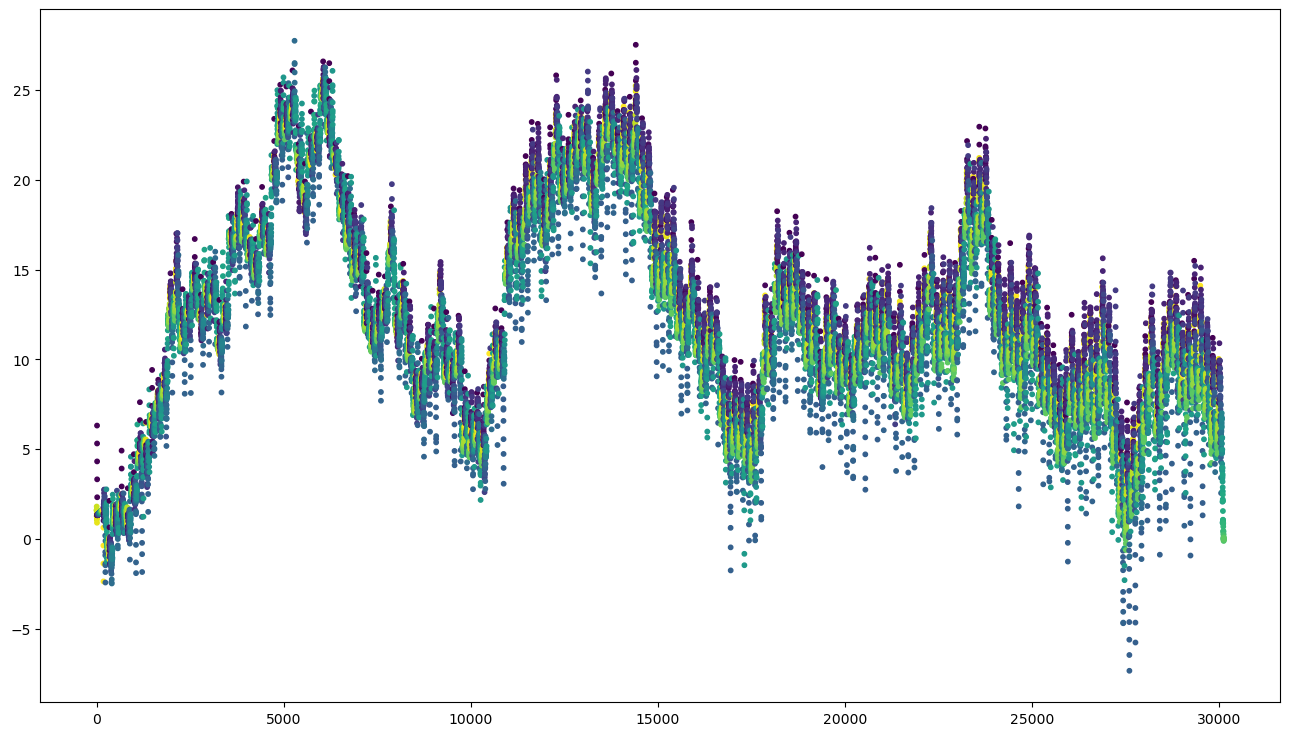

In [11]:
delta_phases_subtracted = np.array(oog.delta_phases) - np.mean(oog.delta_phases)
plt.figure(figsize = (16,9))
plt.scatter(range(len(np.cumsum(delta_phases_subtracted))), np.cumsum(delta_phases_subtracted), c = oog.phases[1::], s = 10)
plt.show()

In [12]:
# Gets the noise spectrum by looking at the standard deviation of the change in delta phases over some time period.
def get_noise_spectrum(delta_phases, averaging_window):
    time_windows = range(1, (delta_phases.shape[0] - averaging_window) // 2)
    avg_delta_phases_std = []
    for time_window in time_windows:
        avg_delta_phases = []
        for i in np.arange(delta_phases.shape[0] - time_window - averaging_window):
            average_delta_phase_init = np.mean(delta_phases[i:i + averaging_window])
            average_delta_phase_final = np.mean(delta_phases[i + time_window:i + time_window + averaging_window])

            est_avg_delta_phases = average_delta_phase_init - average_delta_phase_final

            avg_delta_phases.append(est_avg_delta_phases)

        #plt.title(f"{time_window}")
        #plt.hist(avg_delta_phases, bins = 30)
        #plt.show()

        avg_delta_phases_std.append(np.std(avg_delta_phases))

    return time_windows, avg_delta_phases_std

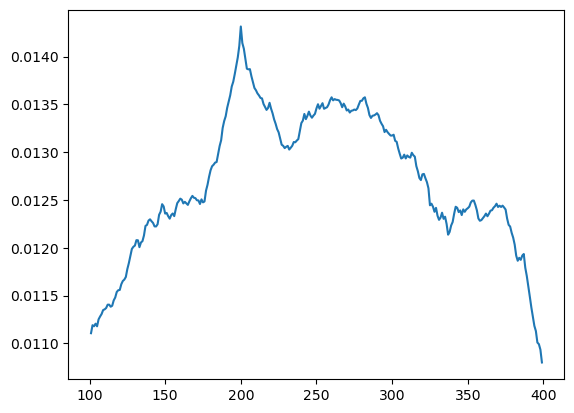

In [13]:
time_windows, avg_delta_phases_std = get_noise_spectrum(oog.delta_phases[0:1000], 200)
plt.plot(time_windows[100::], avg_delta_phases_std[100::])
plt.show()

In [98]:
data = OG.SequenceManager.load_tif(r"E:\2024-04-05 12.53.59 vid no water\Allied Vision Technologies GS650 0001f61c\*tif")

In [140]:
# Get mean intensity
mean_intensity = np.mean(data, axis = (1,2))**2

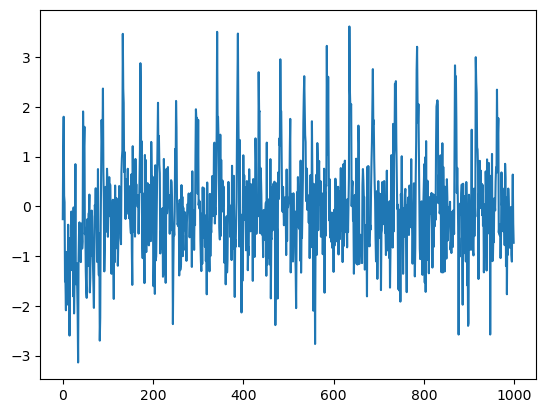

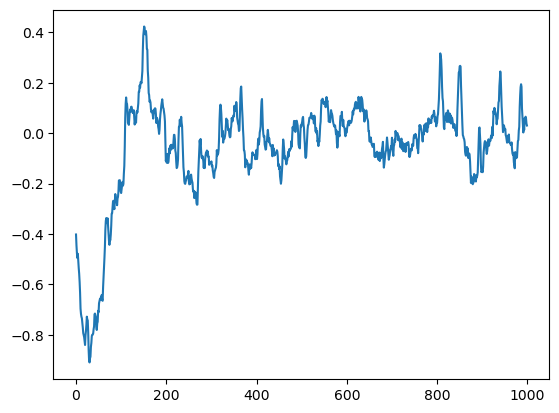

In [163]:
# Detrend mean with moving average
detrended_mean_intensity = mean_intensity - np.convolve(mean_intensity, np.ones(200)/200, mode = "same")

plt.plot(detrended_mean_intensity[0:1000])
plt.show()

# Plot moving average of detrended mean intensity
plt.plot(np.convolve(detrended_mean_intensity, np.ones(50)/50, mode = "same")[0:1000])
plt.show()

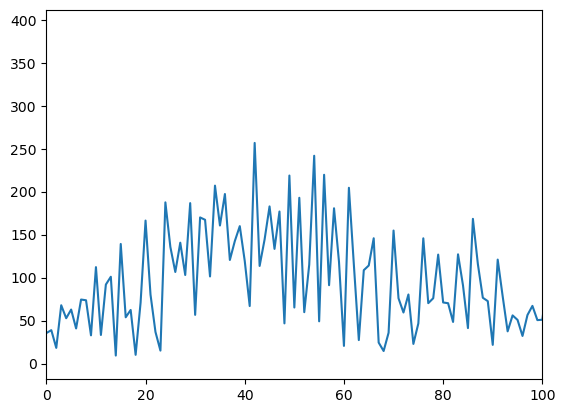

In [164]:
# Plot fourier transform of detrended mean intensity
fourier = np.fft.rfft(detrended_mean_intensity)
plt.plot(range(len(fourier)), np.abs(fourier))
plt.xlim(0,100)
plt.show()

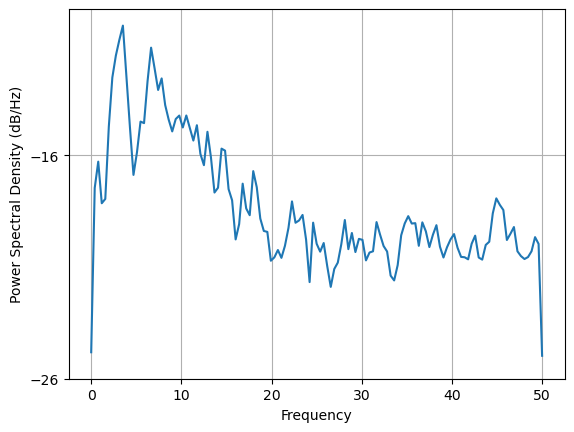

In [159]:
# Get power spectral density of detrended mean intensity
plt.psd(detrended_mean_intensity, NFFT = 2**8, Fs = 100)
plt.show()